In [6]:
#Import the Dataset 
import pandas as pd

df = pd.read_csv(r'C:\Users\spamm\Desktop\Models_1.0\Dataset_All_1.0.csv',low_memory=False,encoding='iso-8859-1')  
df

DF_Q = df
DF_2021_D= DF_Q['2021_Overall'].dropna()
DF_2021_D

DF_Q = df
DF_2019_D= DF_Q['2019_Overall'].dropna()
DF_2019_D

0                                   the inclusive nature
1      I enjoy singing with all my friends. I really ...
2                Its informality and friendly atmosphere
4      The conductor, Kym, has unflagging enthusiasm ...
6         Its informality.  The lack of demand. The fun.
                             ...                        
933                                                   No
935    Stop the solo sections - we are a community choir
936    the membership payment methods and process is ...
937                      Its all good nothing to change 
938                              Bigger variety of songs
Name: 2019_Overall, Length: 837, dtype: object

In [33]:
documents_2019 = DF_2019_D.loc[DF_2019_D.str.contains('Dillon')]
documents_2019

documents_2021 = DF_2021_D.loc[DF_2021_D.str.contains('Dillon')]
documents = documents_2019.append(documents_2021)
#documents_2021
#documents_2019 = documents_2019.reset_index(drop = True)


documents_Total = pd.DataFrame(documents)
documents_Total = documents_Total.reset_index(drop = True)
documents_Total.rename(columns={documents_Total.columns[0]: "Overall"}, inplace=True)
documents_Total

Overall
0                                          Kym Dillon
1   The variety of songs we sing, the opportunity ...
2                                          Kym Dillon
3                                          Kym Dillon
4             Kym Dillon.   Group Singing.   Supper. 
5                            The conductor Kym Dillon
6   Kym Dillon's skills in conducting/leading and ...
7   Conductor (Kym Dillon) is hilarious and really...
8   Singing a range of songs, different genre's.  ...
9   Kym Dillon and his expertise.  His humour, his...
10  Our conductor Kym Dillon is an exceptionally t...
11  Our conductor Kym Dillon. She is not only a sk...
12  The opportunity to sing in a choir & also to p...
13  It brings me such joy, to sing and watch other...
14  Inclusive, welcoming choir with totally brilli...

In [35]:
#Overall
import re
import nltk
documents = documents_Total['Overall']
Cleaned_doc = []
for r in range(1,len(documents)):
    review = documents[r]
    try:
        review = re.sub('[^A-Za-z]', ' ', review) 
        review = review.lower()
        Tokens = review.split()
        Filtered_token = [w for w in Tokens if len(w)>3] 
        Filtered_noun = [word for word,pos in nltk.pos_tag(Filtered_token) if(pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
        review = ' '.join(Filtered_noun)
    except:
        continue
    Cleaned_doc.append(review)

In [36]:
Cleaned_doc

['variety songs opportunity perform conductor dillon',
 'dillon',
 'dillon',
 'dillon group supper',
 'conductor dillon',
 'dillon skills group people energy inclusiveness creativity selflessness',
 'conductor dillon everyone companionship people differences',
 'range songs genre dillon conductor choir leader',
 'dillon expertise humour ability groups skill levels',
 'conductor dillon conductor personality harmonise',
 'conductor dillon teaching parts',
 'opportunity choir performances conductor dillon',
 'brings watch others people life leader dillon',
 'choir conductor dillon']

In [50]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.append('supper')
stop_words.append('dillon')
stop_words.append('group')
stop_words.append('groups')
stop_words.append('songs')
stop_words.append('people')
stop_words.append('choir')
stop_words.append('opportunity')
stop_words.append('brings')

for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)
    
Cleaned_doc = [x for x in Cleaned_doc if x != '']    

In [51]:
Cleaned_doc

['variety perform conductor',
 'conductor',
 'skills energy inclusiveness creativity selflessness',
 'conductor everyone companionship differences',
 'range genre conductor leader',
 'expertise humour ability skill levels',
 'conductor conductor personality harmonise',
 'conductor teaching parts',
 'performances conductor',
 'watch others life leader',
 'conductor']

In [52]:
#Vector the Data
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<11x27 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


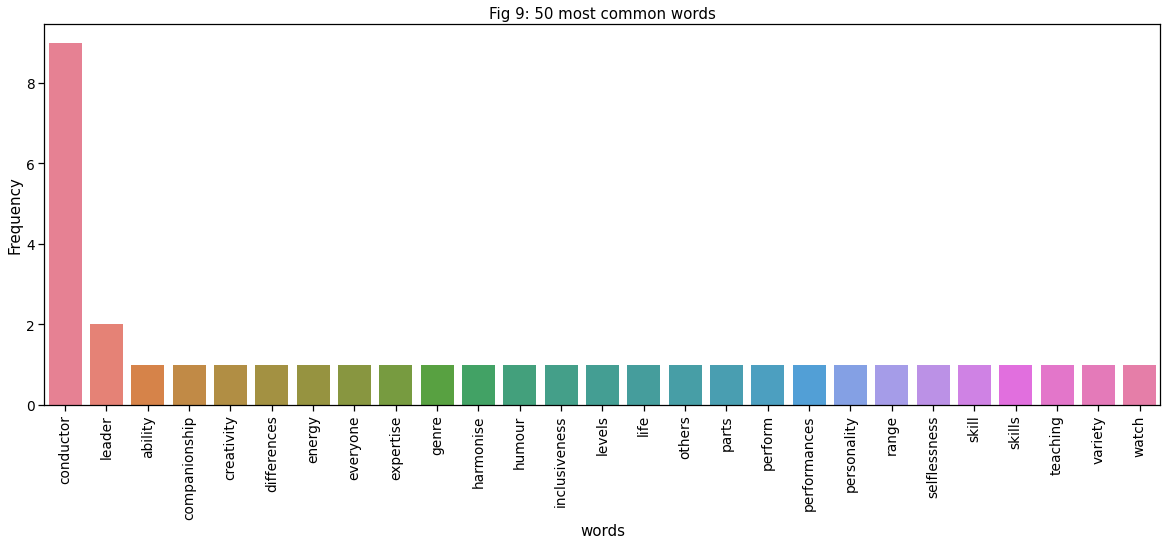

In [54]:
#PLot the word frequency
terms = count_vectorizer.get_feature_names()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
    
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
    
plt.figure(2, figsize=(20,7))
plt.subplot(title='Fig 9: 50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('Frequency')
plt.show()

In [55]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 5 and total_counts[t] > 0:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

#install packages
!pip install Cython
!pip install gensim 

Number of Terms Remained:  26


In [56]:
#Data preperation for Gensim:
Cleaned_doc_new = []
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
             each_item.append(t)
    Cleaned_doc_new.append(each_item) 

# Construct term dictionary in the format "Term : Index"
import gensim.corpora as corpora
id2word = corpora.Dictionary(Cleaned_doc_new)
id2word.token2id

#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_new]


#Run the model with 10 topics
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint#

#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                       id2word=id2word,
                                       num_topics=10,
                                       random_state=100)

#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.038*"performances" + 0.038*"personality" + 0.038*"variety" + '
  '0.038*"parts" + 0.038*"leader" + 0.038*"harmonise" + 0.038*"everyone" + '
  '0.038*"companionship" + 0.038*"perform" + 0.038*"differences"'),
 (1,
  '0.038*"performances" + 0.038*"variety" + 0.038*"leader" + '
  '0.038*"personality" + 0.038*"teaching" + 0.038*"parts" + 0.038*"everyone" + '
  '0.038*"perform" + 0.038*"others" + 0.038*"harmonise"'),
 (2,
  '0.075*"humour" + 0.075*"ability" + 0.075*"levels" + 0.075*"skill" + '
  '0.075*"expertise" + 0.075*"companionship" + 0.075*"differences" + '
  '0.075*"everyone" + 0.075*"parts" + 0.075*"harmonise"'),
 (3,
  '0.115*"skills" + 0.115*"selflessness" + 0.115*"creativity" + 0.115*"energy" '
  '+ 0.115*"inclusiveness" + 0.115*"perform" + 0.115*"variety" + '
  '0.010*"performances" + 0.010*"teaching" + 0.010*"leader"'),
 (4,
  '0.038*"performances" + 0.038*"teaching" + 0.038*"leader" + 0.038*"perform" '
  '+ 0.038*"harmonise" + 0.038*"everyone" + 0.038*"personality" +

In [57]:
# Compute Coherence Score. Note: that CoherenceModel require 
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, 
                                     texts=Cleaned_doc_new, 
                                     dictionary=id2word, 
                                     coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6994142752537653


In [58]:
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(1,2,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
                                               id2word=id2word,
                                               num_topics=top,
                                               random_state=100)
    #Keep the trained models
    Trained_Models.append(lda_model)
    #Compute coherence score for each model
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                         texts=Cleaned_doc_new, 
                                         dictionary=id2word, 
                                         coherence='c_v')
    coherence = coherence_model_lda.get_coherence()
    #Save and print the coherence scores 
    coherence_scores.append(coherence)
    print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 1 -- Coherence: 0.6468972991498981


In [59]:
#View the best topics:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]

#Show top 10 words in each topic
WordList = lda_model.show_topics(num_words=10)
WordList

[(0,
  '0.057*"leader" + 0.038*"ability" + 0.038*"range" + 0.038*"others" + 0.038*"parts" + 0.038*"humour" + 0.038*"personality" + 0.038*"creativity" + 0.038*"energy" + 0.038*"differences"')]

In [60]:
#Best Model with 11 Topics
#Build an LDA model with 10 Topics
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 1
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

#Get the Topic word weights
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))
        
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords 

[[0.03773585 0.03773585 0.03773585 0.03773585 0.03773585 0.03773585
  0.03773585 0.03773585 0.03773585 0.03773585 0.03773585 0.05660377
  0.03773585 0.03773585 0.03773585 0.03773585 0.03773585 0.03773585
  0.03773585 0.03773585 0.03773585 0.03773585 0.03773585 0.03773585
  0.03773585 0.03773585]]

Topic #0:
leader : 0.057
ability : 0.038
companionship : 0.038
creativity : 0.038
differences : 0.038


ability  companionship  creativity  differences    energy  everyone  \
0  0.037736       0.037736    0.037736     0.037736  0.037736  0.037736   

   expertise     genre  harmonise    humour  ...   perform  performances  \
0   0.037736  0.037736   0.037736  0.037736  ...  0.037736      0.037736   

   personality     range  selflessness     skill    skills  teaching  \
0     0.037736  0.037736      0.037736  0.037736  0.037736  0.037736   

    variety     watch  
0  0.037736  0.037736  

[1 rows x 26 columns]

In [62]:
#plot the word cloud of the topics
from wordcloud import WordCloud
from matplotlib import pyplot

import math 
rows = math.ceil(len(Word_Topics_Pro)/4) 
fig, ax = pyplot.subplots(rows, 4, figsize=(25,8.5*rows)) 
[axi.set_axis_off() for axi in ax.ravel()] 

for topic_idx, topic in enumerate(Word_Topics_Pro): 
    count_dict = (zip(ReducedTerm, topic)) 
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    #convert to dictionary type - keep top 10 words 
    Word_Frequency = dict(count_dict[0:15]) 
    # generate word cloud 
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency) 
    # visualize word cloud in figure 
    subfig_Row = math.floor(topic_idx) 
    #subfig_Col = math.ceil(topic_idx%4) 
    ax[subfig_Row].imshow(wordcloud) 
    ax[subfig_Row].set_title("Topic {}".format(topic_idx+1)) 
plt.show()